In [16]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import librosa
from IPython.display import Audio

import sys
sys.path.append("../")
from src.file_io import write_signal_to_wav, load_signal_from_wav

fs = 16000

## Drone

In [17]:
os.makedirs(f"drone", exist_ok=True)

for i, file_path in enumerate(glob.glob("propeller/*.wav")):
    signal = load_signal_from_wav(file_path, fs)
    idx_start = 0
    for j in range(2):
        idx_start += np.random.randint(0, int(fs * 4))
        idx_end = idx_start + int(fs * 5)
        write_signal_to_wav(signal[idx_start:idx_end], f"drone/{2 * i + j:02}.wav", fs)
        idx_start = idx_end

## Voice

In [ ]:
os.makedirs(f"voice", exist_ok=True)

for i, file_path in enumerate(glob.glob("propeller/*.wav")):
    signal = load_signal_from_wav(file_path, fs)
    idx_start = 0
    for j in range(2):
        idx_start += np.random.randint(0, int(fs * 4))
        idx_end = idx_start + int(fs * 5)
        write_signal_to_wav(signal[idx_start:idx_end], f"voice/{2 * i + j:02}.wav", fs)
        idx_start = idx_end

## Ambient

### **radio**

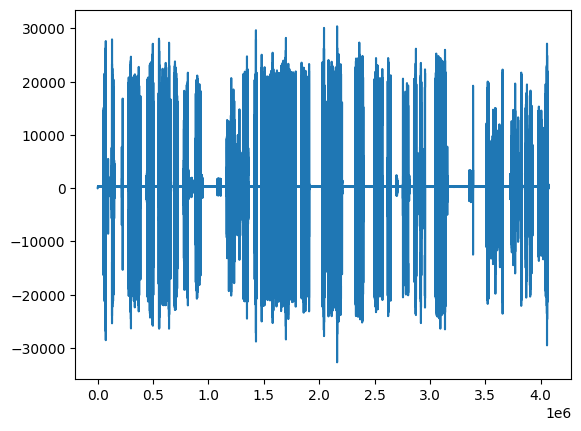

In [3]:
signal = load_signal_from_wav("police_radio.wav", fs)
plt.plot(signal)

334.60340769135047


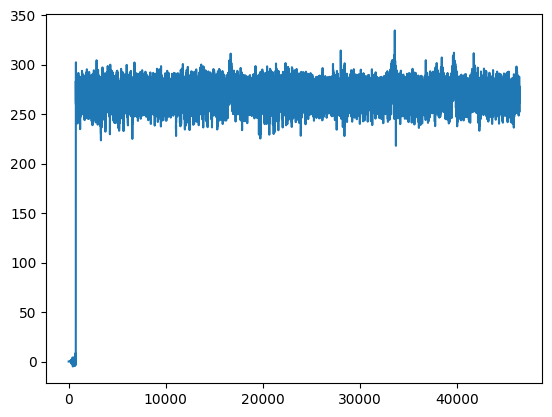

In [4]:
chunk = signal[:int(2.9 * fs)]
print(np.max(chunk))
plt.plot(chunk)

In [5]:
chunk = signal[:int(3 * fs)]
Audio(chunk, rate=fs)

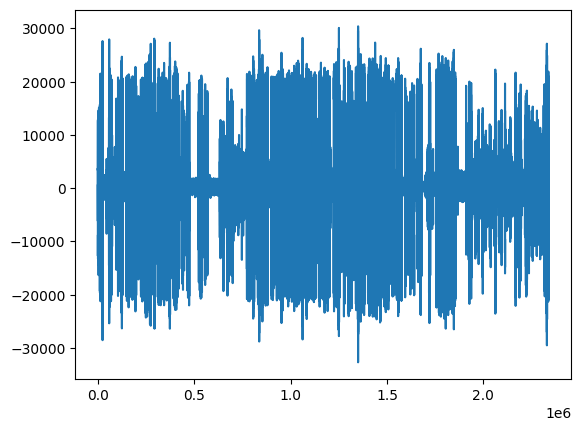

In [6]:
dst = []
duration = 0
thresh = 500

for s in signal:
    if duration == 0 and abs(s) < thresh:
        continue
    duration += 1
    dst.append(s)
    if abs(s) < thresh and duration > int(fs * 0.5):
        duration = 0

dst = np.array(dst)
plt.plot(dst)

In [7]:
Audio(dst, rate=fs)

In [9]:
idx_start = 0
os.makedirs(f"ambient", exist_ok=True)

for i in range(5):
    idx_start += np.random.randint(0, int(fs * 4))
    idx_end = idx_start + int(fs * 5)
    write_signal_to_wav(dst[idx_start:idx_end], f"ambient/radio_{i}.wav", fs)
    idx_start = idx_end

### **engine**

In [13]:
signal = load_signal_from_wav("engine.wav", fs)
print(len(signal) / fs)

60.9689375


In [14]:
idx_start = 0
os.makedirs(f"ambient", exist_ok=True)

for i in range(5):
    idx_start += np.random.randint(0, int(fs * 4))
    idx_end = idx_start + int(fs * 5)
    write_signal_to_wav(dst[idx_start:idx_end], f"ambient/engine_{i}.wav", fs)
    idx_start = idx_end